<a href="https://colab.research.google.com/github/Anjinhyoung/TIL-Today-I-Learned/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Decision_Tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dt =  DecisionTreeRegressor(random_state=2023)

In [47]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2023)

In [48]:
pred1 = dt.predict(X_test)

<Axes: xlabel='count'>

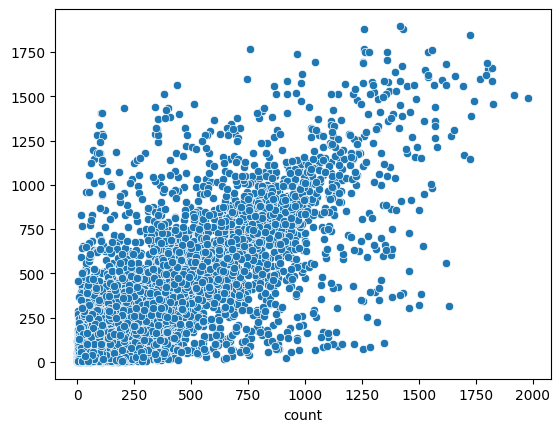

In [49]:
sns.scatterplot(x=y_test,y=pred1)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_test,pred1, squared=False)

222.90547303762153

# 3.선형 회귀 vs 의사 결정 나무

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
pred2 = lr.predict(X_test)

<Axes: xlabel='count'>

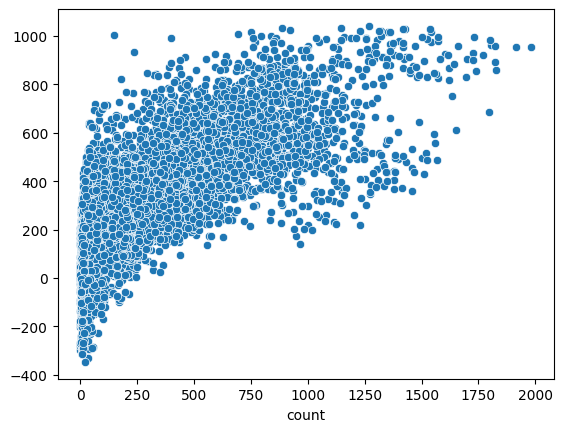

In [56]:
sns.scatterplot(x=y_test, y=pred2)
# 의사 결정 나무에 비해 곡선으로 휘어짐
# 즉 올 곧게 직선으로 뻗어야 더 좋은 알고리즘

In [57]:
mean_squared_error(y_test,pred2, squared=False)

224.5257704711731

In [58]:
222.90547303762153 - 224.5257704711731

-1.6202974335515705

In [59]:
# 하이퍼 파라미터 적용
dt = DecisionTreeRegressor(random_state=2023, max_depth=50, min_samples_leaf = 30)
# max_depth(최대 깊이):트리의 레벨(높이)은 최대 50
# min_samples_leaf(리프 노드 최소 샘플 수):리프 노드가 될 때는 최소 30개의 샘플을 가져야 한다.
# 리프 노드:더 이상 자식 노드가 없는 노드

In [60]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=30, random_state=2023)

In [61]:
pred3 = dt.predict(X_test)

In [62]:
mean_squared_error(y_test,pred3, squared=False)

186.56448037541028

In [63]:
# 의사 결정 나무 RSME:222.90547303762153 여기서 오버피팅이 일어남 가지치기를 하니깐 loss값이 줄어 듦
# 선형 회귀 RMSE:224.5257704711731
# 의사 결정 나무 하이퍼 파라미터 튜닝RMSE:186.56448037541028

In [64]:
from sklearn.tree import plot_tree

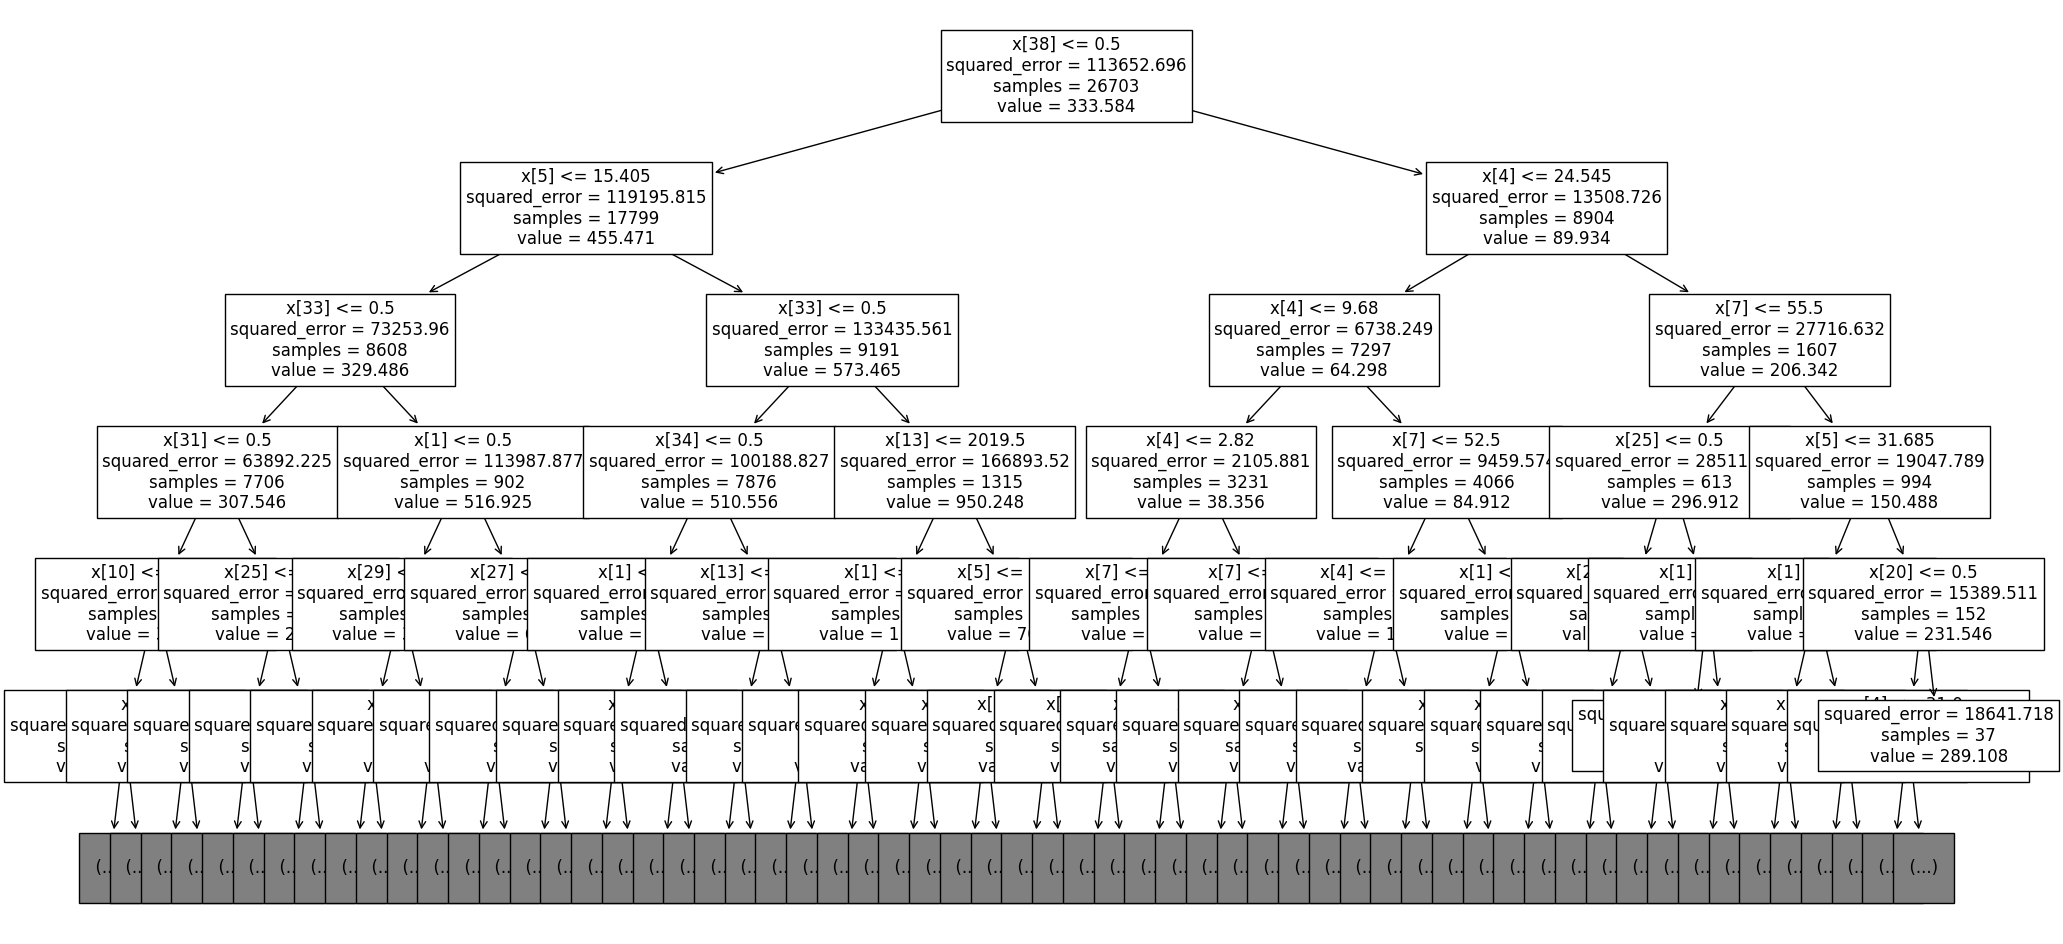

In [65]:
plt.figure(figsize=(24, 12))
plot_tree(dt, max_depth=5, fontsize=12)
plt.show()

# squared_error:이것은 분할 기준으로 사용되는 손실 함수(또는 비용 함수) 중 하나로, 오류를 제곱하여 계산하는 방식
# 분할 시에 각 분할 구역의 예측 값과 실제 값 사이의 차이를 제곱하고, 이를 모두 합한 것이 loss 값이 된다.
# 의사결정나무는 데이터를 분할하는 과정에서 이러한 loss 값을 최소화하도록 분할 기준을 선택

# samples:분할 기준으로 사용되는 속성(또는 특성)에 따라 각 분할 구역에 속하는 데이터 샘플의 수를 의미
# 의사결정나무는 이 값을 활용하여 데이터를 분할할 때 적절한 규칙을 찾는다.

# value:각 분할 구역(또는 말단 노드)에 속하는 데이터 샘플들의 실제 타겟 값들에 대한 정보
# 이 값들을 기반으로 의사결정나무는 각 구역의 타겟 값 예측치를 계산하고, 이를 기준으로 *최적의 분할 기준을 선택
# "value"는 일반적으로 분류 문제의 경우 해당 클래스별로 데이터 샘플의 수를 의미하며,
# 회귀 문제의 경우 해당 구역의 평균 타겟 값들을 나타낸다.

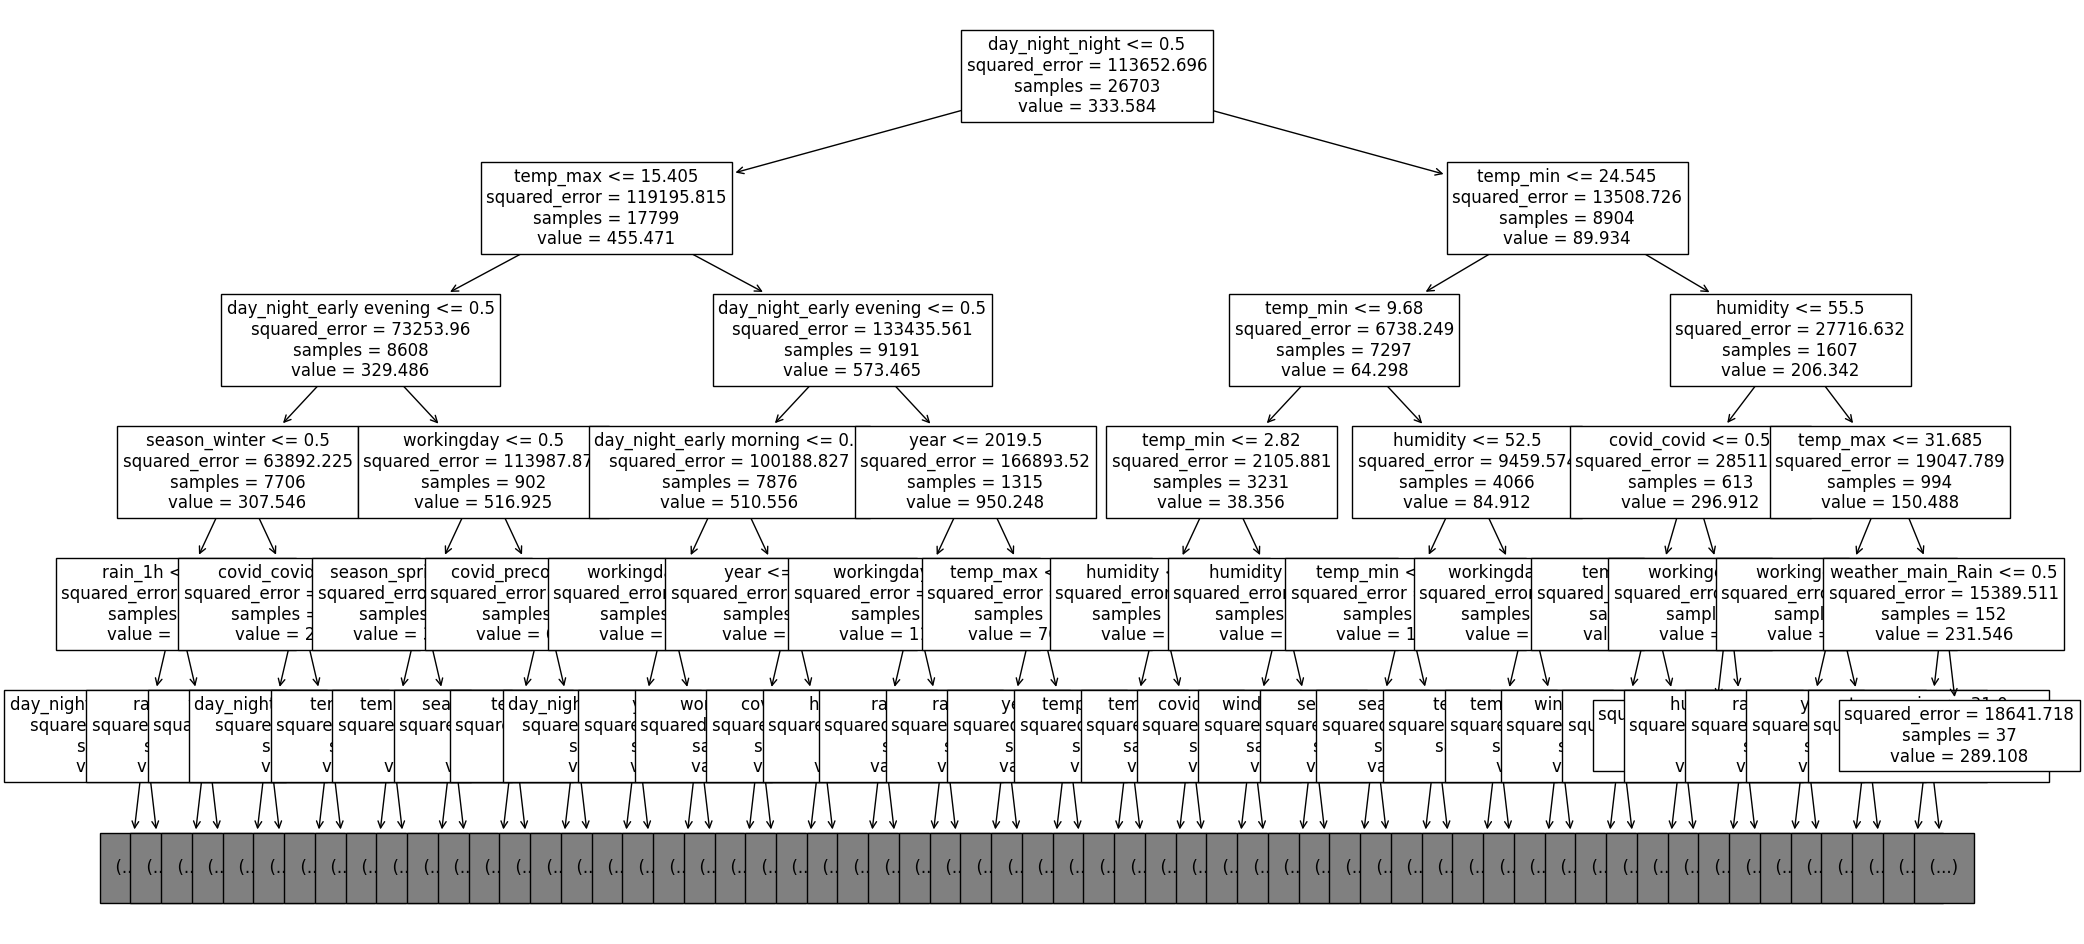

In [66]:
plt.figure(figsize=(24, 12))
plot_tree(dt, max_depth=5, fontsize=12, feature_names=X_train.columns)
plt.show()